In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
df = pd.read_csv('selected_features_without_text.csv')

In [13]:
df = df.drop(columns=["Unnamed: 0","reviewID", "restaurantID"])

In [20]:
df['reviewRating_1'] = df['reviewRating_1'].astype(int)
df['reviewRating_2'] = df['reviewRating_2'].astype(int)
df['reviewRating_3'] = df['reviewRating_3'].astype(int)
df['reviewRating_4'] = df['reviewRating_4'].astype(int)
df['reviewRating_5'] = df['reviewRating_5'].astype(int)

In [21]:
X = df.drop(['flagged'], axis=1) 
y = df.flagged

In [22]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [23]:
X_train = X_train.drop(['reviewerID'], axis = 1)

In [24]:
X_test = X_test.drop(['reviewerID'], axis = 1)

In [25]:
X_train

,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5
1,0.000000,0.001149,0.000000,841,4.5,0.183244,0.031250,0.068376,0.466667,0.566667,0.263158,0,0,0,0,1
2,0.000425,0.003831,0.000276,841,4.5,0.565800,0.028125,0.042735,0.413333,0.720000,0.473684,0,0,1,0,0
3,0.017850,0.022605,0.001609,841,4.5,0.689365,0.262500,0.290598,0.120548,0.535201,0.868421,0,0,1,0,0
4,0.070761,0.462835,0.075869,841,4.5,0.725708,0.090625,0.170940,0.167460,0.564683,0.868421,0,0,0,0,1
5,0.012537,0.020307,0.003127,841,4.5,0.430375,0.234375,0.324786,0.177801,0.458819,0.868421,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26947,0.006162,0.009962,0.001885,18,4.5,0.222265,0.137500,0.085470,0.236429,0.519524,0.763158,0,0,0,0,1
26949,0.002125,0.003065,0.000368,14,4.0,0.170620,0.015625,0.034188,0.460000,0.490000,0.342105,0,0,0,0,1
26951,0.006587,0.062835,0.009242,14,4.0,0.553175,0.050000,0.051282,0.226623,0.760173,0.763158,0,0,0,1,0
26952,0.001275,0.003831,0.000322,15,4.0,0.598317,0.053125,0.076923,0.269271,0.608333,0.894737,0,0,0,0,1


In [27]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/100
672/672 [==============================] - 1s 1ms/step - loss: 0.8445 - precision: 0.3099 - val_loss: 0.8787 - val_precision: 1.0000
Epoch 2/100
672/672 [==============================] - 1s 975us/step - loss: 0.6917 - precision: 0.3742 - val_loss: 0.4841 - val_precision: 0.6444
Epoch 3/100
672/672 [==============================] - 1s 948us/step - loss: 0.6138 - precision: 0.4274 - val_loss: 0.5237 - val_precision: 0.4492
Epoch 4/100
672/672 [==============================] - 1s 911us/step - loss: 0.5653 - precision: 0.4478 - val_loss: 0.8293 - val_precision: 0.9091
Epoch 5/100
672/672 [==============================] - 1s 934us/step - loss: 0.5295 - precision: 0.4915 - val_loss: 0.4674 - val_precision: 0.7194
Epoch 6/100
672/672 [==============================] - 1s 950us/step - loss: 0.5640 - precision: 0.4722 - val_loss: 0.4269 - val_precision: 0.7208
Epoch 7/100
672/672 [==============================] - 1s 959us/step - loss: 0.5139 - precision: 0.5096 - val_loss: 0.99

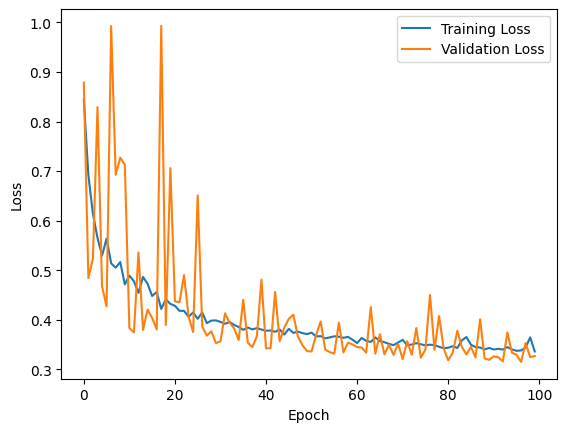

In [28]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/20
336/336 [==============================] - 1s 2ms/step - loss: 0.7498 - recall: 0.0873 - val_loss: 0.4801 - val_recall: 0.0084
Epoch 2/20
336/336 [==============================] - 0s 1ms/step - loss: 0.5362 - recall: 0.1416 - val_loss: 0.4559 - val_recall: 0.1855
Epoch 3/20
336/336 [==============================] - 0s 1000us/step - loss: 0.5184 - recall: 0.1955 - val_loss: 0.4319 - val_recall: 0.1596
Epoch 4/20
336/336 [==============================] - 0s 1ms/step - loss: 0.5286 - recall: 0.2532 - val_loss: 0.4228 - val_recall: 0.2281
Epoch 5/20
336/336 [==============================] - 0s 977us/step - loss: 0.4808 - recall: 0.2540 - val_loss: 0.6440 - val_recall: 0.0125
Epoch 6/20
336/336 [==============================] - 0s 963us/step - loss: 0.5353 - recall: 0.3060 - val_loss: 0.4671 - val_recall: 0.0735
Epoch 7/20
336/336 [==============================] - 0s 959us/step - loss: 0.4745 - recall: 0.3106 - val_loss: 1.0554 - val_recall: 0.9783
Epoch 8/20
336/336 [=====

172/172 [==============================] - 0s 864us/step


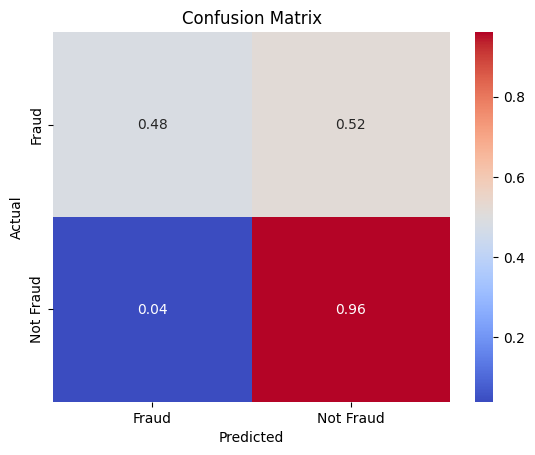

Confusion Matrix:
[[0.48354726 0.51645274]
 [0.03926483 0.96073517]]
Accuracy: 0.5877417001094491
Precision: 0.34195658638120724
Recall: 0.960735171261487
F1-Score: 0.5043859649122807


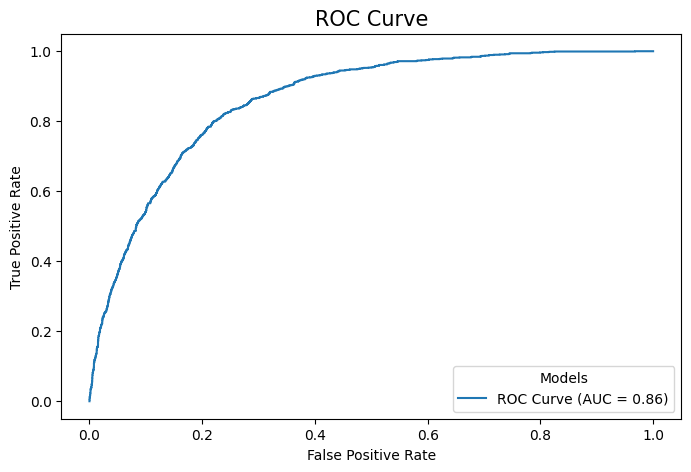

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
# Assuming 'model' is your trained TensorFlow model and 'X_test_scaled' is your scaled test set
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.09).astype(int)  # Adjust threshold as needed

# Convert y_test to binary (if it's not already)
y_test_binary = (y_test > 0.09).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary,normalize = 'true')
sns.heatmap(conf_matrix,annot=True,fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1-Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
auc = roc_auc_score(y_test_binary, y_pred)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.show()
